<a href="https://colab.research.google.com/github/dsdayat/Reduksi-menngunakan-PCA/blob/main/HW_Unsupervised_Dimensionality_Reduction_Agus_Nur_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Package

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [13]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

In [14]:
boston.columns= boston.columns.str.strip().str.lower()

In [15]:
boston.isna().sum() * 100 / len(boston)

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

There is no Missing Value

In [16]:
boston.duplicated().sum()

0

There is no Duplicated data

In [17]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


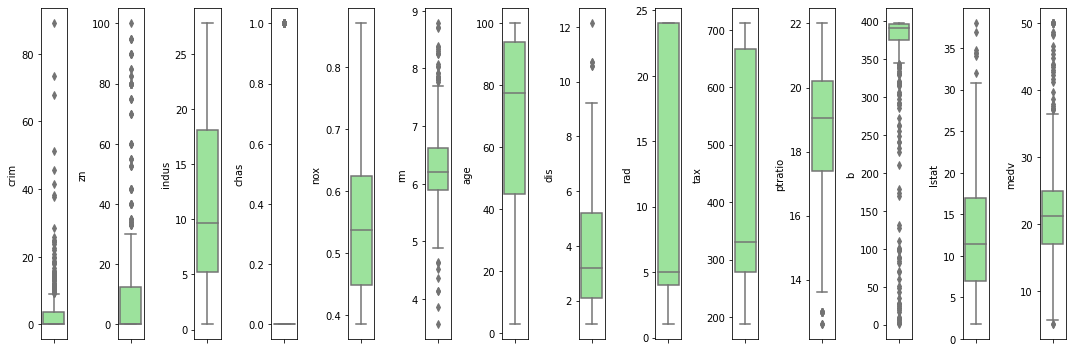

In [18]:
#all data categories is numerical so we can check outliers directly
plt.figure(figsize=(15,5))

features = boston.columns.unique()
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=boston[features[i]], color='lightgreen')
    plt.tight_layout()

there are so many outliers in feature: ['crim', 'zn', 'rm','ptratio','black','lstat','medv'.]
- Since the medv is the target  and has outlier.
- Since All of outliers represent true values from **natural variation** in the population we can ignore the outliers

In [23]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- The Count shown similar counting number of data, this means there is no missing value
- The minimal and maksimal is reasoable even there are many outliers
- The feature which mean and quartil 50% has a lot differences are ['crim', 'zn','age','rad','tax','b']

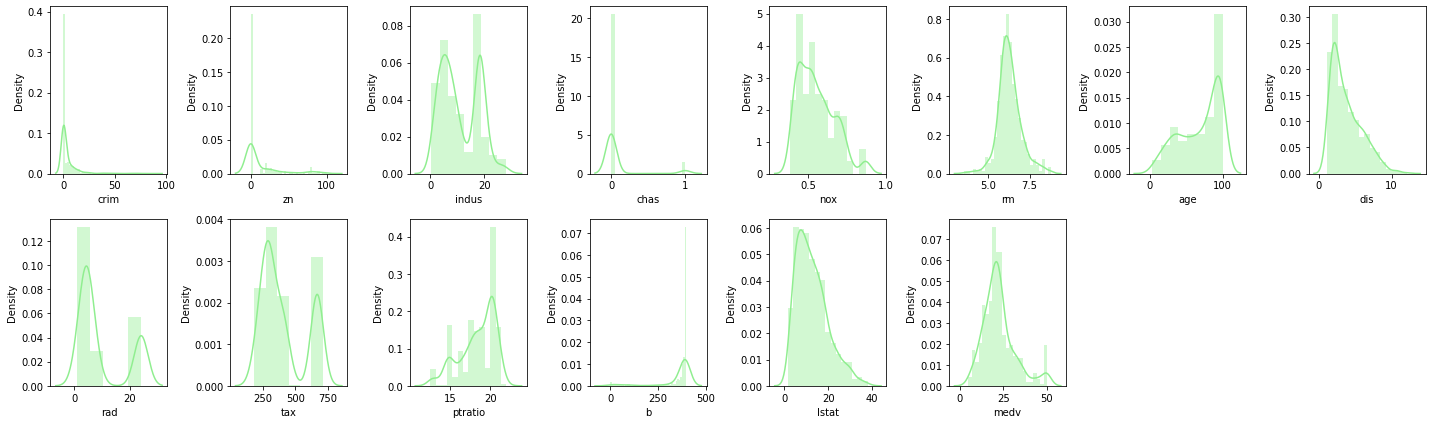

In [21]:
plt.figure(figsize=(20,6))
features = boston.columns.unique()
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=boston[features[i]], color='lightgreen')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation Distribution Column
- symetric feature are : chas,indus, rm, rad, tax, black, medv
- Postive skewed are :crim, zn, nox, dis, lstat, 
- Negative skewed are : age, ptratio 
- Since the medv is target, the medv has normal distribution with few outliers
- The Scaling Method is Necessary through the linear regression

In [25]:
x = boston.drop('medv', axis=1)
y = boston['medv']


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
xa = scaler.transform(x)

In [29]:
#ubah ke datafram lagi
xstd = pd.DataFrame(data = xa, columns = x.columns.unique())
xstd.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(xstd)
pcs = pca.transform(xstd)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9', 'pc10', 'pc11', 'pc12','pc13'])
pdf['medv'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,medv
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2


skree plot

In [34]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
Explained variance ratio: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


In [37]:
#Explained variance ratio dijumlahkan sampai 80%
0.47129606 + 0.11025193 + 0.0955859 + 0.06596732 + 0.06421661

0.8073178200000001

<BarContainer object of 13 artists>

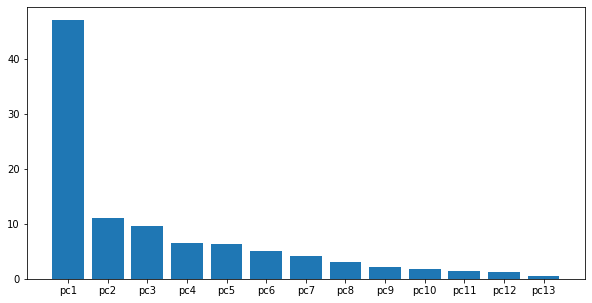

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9', 'pc10', 'pc11', 'pc12','pc13'], pca.explained_variance_ratio_ * 100)

cukup sampai pc5 data sudah dapat terwakili sampai 80% 

In [38]:
pca = PCA(n_components=5)#n componetn itu nilai pc nya 
pca.fit(xstd)
pcs = pca.transform(xstd)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5'])
X_std_pca['medv'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,medv
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,36.2


Sampling data

In [39]:
#data pake PCA
from sklearn.model_selection import train_test_split
X_pca = X_std_pca.drop('medv', axis=1)
y_pca = X_std_pca['medv']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)

In [40]:
#data biasa tanpa PCA
X_train, X_test,Y_train,Y_test = train_test_split(xstd,y,
                                                test_size = 0.4,
                                                random_state = 42)


Celaning Multicol dulu sebelum di modelling

In [48]:
# calculate VIF scores for each feature untuk data pca
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_pca)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,pc1,1.005204
2,pc2,1.009208
3,pc3,1.007143
4,pc4,1.009712
5,pc5,1.008768


There is no Multicolinear

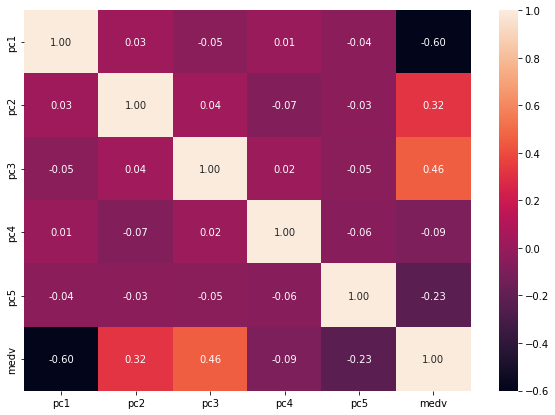

In [49]:
# heatmap correlation data PCA
medv_train = pd.concat([X_train_pca, Y_train_pca], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

There is no high correlation more than 0.8 

In [41]:
# calculate VIF scores for each feature untuk data biasa
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.786397
2,zn,2.423357
3,indus,3.753914
4,chas,1.094554
5,nox,4.751007
6,rm,1.883231
7,age,2.951169
8,dis,4.032232
9,rad,7.719728
10,tax,8.815889


Standard rule for VIF :
- VIF == 1 → No multicollinearity
- VIF between 4 and 10 → Moderate multicollinearity
- VIF > 10 → Severe multicollinearity

Actual Data : 
- There are No Multicol except **['tax','rad','dis' and 'nox']**
- **['tax','rad','dis' and 'nox']** are Moderate Multicol
- There is no Severe multicol

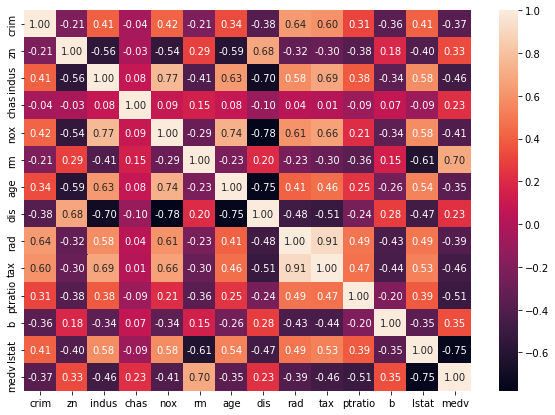

In [42]:
# heatmap correlation data biasa
medv_train = pd.concat([X_train, Y_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

*Standard Rule of high corr*

Threshold: abs(corr) >= 0.8, 

*Actual observation from heatmap*
- There are strong corr between rad (0.91) and tax (0.91), anyway just drop the lower value between rad and tax toward medv.
drop rad (-0.39) 

In [44]:
#feature high coor >=0.8 will be drop
X_train = X_train.drop(columns=['rad'])  
X_test = X_test.drop(columns=['rad'])

## Regression Model (20 point)

bebas menggunakan model apapun

In [52]:
from sklearn.linear_model import Ridge
# model linier regression pake ridge dengan data pca
# train the model
X_medv_train_pca = X_train_pca.to_numpy()
y_medv_train_pca = Y_train_pca.to_numpy()
y_medv_train_pca = y_medv_train_pca.reshape(len(y_medv_train_pca),)

# define the model coba alpha 0.1
Ridgepca = Ridge (alpha=0.1, random_state=42)

# fit the model (training)
Ridgepca.fit(X_medv_train_pca, y_medv_train_pca)

Ridge(alpha=0.1, random_state=42)

In [51]:
from sklearn.linear_model import Ridge
# model linier regression pake ridge dengan data biasa
# train the model
X_medv_train = X_train.to_numpy()
y_medv_train = Y_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model coba alpha 0.1
Ridger = Ridge (alpha=0.1, random_state=42)

# fit the model (training)
Ridger.fit(X_medv_train, y_medv_train)


Ridge(alpha=0.1, random_state=42)

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

In [56]:
#ridge pake pca
#Ridge
from sklearn.metrics import mean_squared_error
# test the model
X_medv_test_pca = X_test_pca.to_numpy()
y_medv_test_pca = Y_test_pca.to_numpy()
y_medv_test_pca = y_medv_test_pca.reshape(len(y_medv_test_pca),)

alphas = [0.1]
models = [Ridgepca]

for model, alpha in zip(models, alphas):
    y_predict_test_pca = model.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_medv_test_pca,y_predict_test_pca))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.1 is 4.967972376495403


In [58]:
#ridge pake data biasa
#Ridge
X_medv_test = X_test.to_numpy()
y_medv_test = Y_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

alphas = [0.1]
models = [Ridger]

for model, alpha in zip(models, alphas):
    y_predict_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_medv_test,y_predict_test))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.1 is 4.8217191757629685


*Kesimpulan*


Dengan membandingkan RMSE value dari Ridge regression pada kasus data boston, metode tanpa data pca (data biasa) mempunyai accuracy yang lebih baik dibanding dengan data  pca